begin!
NAG end!
RMSProp end!
AdaDelta end!
Adam end!


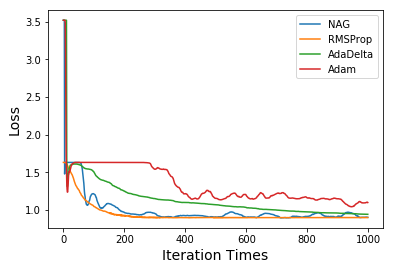

In [1]:
# %load logistic.py
#逻辑回归和随机梯度下降的实验
import matplotlib.pyplot as plt
import numpy as np
import math
import random
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split #引入必要的库 

def get_data():  #获取数据，以及对数据进行一些预处理 
    data=load_svmlight_file('a9a.txt')
    x_train=data[0]
    y_train=data[1] #获取原始数据
    x_train=x_train.toarray()
    data=load_svmlight_file('a9a.t',123)
    x_validation=data[0]
    y_validation=data[1]
    x_validation=x_validation.toarray()
    m,n=np.shape(x_train)
    adder=np.ones(m)
    x_train=np.column_stack((x_train,adder))
    #adder=np.zeros(16281)
    #x_validation=np.column_stack((x_validation,adder))
    adder=np.ones(16281)
    x_validation=np.column_stack((x_validation,adder))
    theta=np.zeros(n+1) #参数初始化
    return x_train,y_train,x_validation,y_validation,theta

def use_NAG(iterations,rate,theta,x_train,y_train):
    global loss_NAG
    k,j=np.shape(x_train)
    vt=theta-theta
    yita=0.99 #动量因子，超参数
    eps=0.0001
    theta_old=theta
    iteration_times=0
    gradient=theta-theta
    for i in range(0,iterations):
        iteration_times+=1
        samples=[random.randint(0,k-1)for ii in range(30)]
        for ii in samples: #每次就用一部分样本进行更新
            if y_train[ii]<0:
                y_train[ii]=0
            theta_temp=theta-yita*vt #加上历史数据来计算我们的梯度
            hypothesis=1/(1+np.exp(-1*np.dot(theta_temp.T,x_train[ii])))
            gradient=gradient+np.dot(hypothesis-y_train[ii],x_train[ii]) #梯度
        gradient=gradient/30
        vt=yita*vt+rate*gradient #动量的计算
        theta=theta-vt
        loss_NAG.append(get_loss(theta)) #计算loss
        
    iteration_time=[i for i in range(0,iteration_times)]
    plt.plot(iteration_time,loss_NAG,label="NAG")



def use_RMSProp(iterations,rate,theta,x_train,y_train): #RMSProp
    global loss_RMSProp
    k,j=np.shape(x_train)
    yita=0.9 #历史信息衰减系数，超参数
    eps=0.0001
    sigmond=0.00000001 #保持数值稳定的微小量
    theta_old=theta
    vt=0.0
    iteration_times=0
    gradient=theta-theta
    for i in range(0,iterations):
        iteration_times+=1
        samples=[random.randint(0,k-1)for ii in range(30)]
        for ii in range(0,k):
            if y_train[ii]<0:
                y_train[ii]=0
            hypothesis=1/(1+np.exp(-1*np.dot(theta.T,x_train[ii])))
            gradient=gradient+np.dot(hypothesis-y_train[ii],x_train[ii])
        gradient=gradient/30
        vt=yita*vt+(1-yita)*np.multiply(gradient,gradient) #同样考虑了历史
        delta_theta=np.multiply((rate/(np.power(vt,0.5)+sigmond)),gradient)
        theta=theta-delta_theta
        loss_RMSProp.append(get_loss(theta))
        
    iteration_time=[i for i in range(0,iteration_times)]
    plt.plot(iteration_time,loss_RMSProp,label="RMSProp")


def use_AdaDelta(iterations,rate,theta,x_train,y_train):
    global loss_AdaDelta
    k,j=np.shape(x_train)
    yita=0.95 #超参数，作为历史信息的衰减系数
    eps=0.0001
    sigmond=0.00000001
    theta_old=theta
    Gt=0.0
    delta_t=0.0
    delta_theta=theta
    iteration_times=0
    gradient=theta-theta
    for i in range(0,iterations):
        iteration_times+=1
        samples=[random.randint(0,k-1) for ii in range(30)]
        for ii in range(0,k):
            if y_train[ii]<0:
                y_train[ii]=0
            hypothesis=1/(1+np.exp(-1*np.dot(theta.T,x_train[ii])))
            gradient=gradient+np.dot(hypothesis-y_train[ii],x_train[ii])
        gradient=gradient/30
        Gt=yita*Gt+(1-yita)*np.multiply(gradient,gradient) #越近的Gt时间越好
        delta_theta=np.multiply(-(np.power(delta_t+sigmond,0.5)/np.power(Gt+sigmond,0.5)),gradient)
        theta=theta+delta_theta
        delta_t=yita*delta_t+(1-yita)*np.multiply(delta_theta,delta_theta)
        loss_AdaDelta.append(get_loss(theta))
        
    iteration_time=[i for i in range(0,iteration_times)]
    plt.plot(iteration_time,loss_AdaDelta,label="AdaDelta")


def use_Adam(iterations,rate,theta,x_train,y_train):
    global loss_Adam
    k,j=np.shape(x_train)
    beta1=0.9 #一阶矩估计衰减，超参数
    beta2=0.99 #二阶矩估计衰减，超参数
    m=0.0
    v=0.0
    sigmond=0.000001
    eps=0.001
    theta_old=theta
    t=0
    iteration_times=0
    gradient=theta-theta
    rate=0.002
    for i in range(0,iterations):
        iteration_times+=1
        t=t+1
        samples=[random.randint(0,k-1) for ii in range(30)]
        for ii in samples:
            if y_train[ii]<0:
                y_train[ii]=0
            hypothesis=1/(1+np.exp(np.dot(-theta.T,x_train[ii])))
            gradient=np.dot(hypothesis-y_train[ii],x_train[ii]) #计算梯度
        gradient=gradient/30
        m=beta1*m+(1-beta1)*gradient #梯度的一阶矩估计
        v=beta2*v+(1-beta2)*np.multiply(gradient,gradient) #二阶矩估计
        alpha=rate*np.power(1-np.power(beta2,t),0.5)/(1-np.power(beta1,t)) #调整学习率
        theta=theta-alpha*m/(np.power(v,0.5)+sigmond)
        loss_Adam.append(get_loss(theta))
        
    iteration_time=[i for i in range(0,iteration_times)]
    plt.plot(iteration_time,loss_Adam,label="Adam")
        

def get_loss(theta): #使用逻辑回归的损失函数计算
    k,j=np.shape(x_validation)
    loss=0.0
    thershold=0.48 #阈值
    
    for i in range(k):
        hypothesis=1/(1+np.exp(-1*np.dot(theta.T,x_validation[i]))) #计算输出的概率
        if hypothesis>thershold: #根据阈值判定
            hypothesis=0.99
        else:
            hypothesis=0.001
        temp=y_validation[i]
        if temp<0:
            temp=0
        loss=loss-(temp*math.log(hypothesis)+(1-temp)*math.log(1-hypothesis)) #计算loss

    loss=loss/k #总的数据集的loss
    return loss



rate=0.003 #学习率
iterations=1000#迭代次数
loss_NAG=[] #保存各种Loss
loss_RMSProp=[]
loss_AdaDelta=[]
loss_Adam=[]
x_train,y_train,x_validation,y_validation,theta=get_data() #获得数据
print("begin!")
use_NAG(iterations,rate,theta,x_train,y_train)
print("NAG end!")
use_RMSProp(iterations,rate,theta,x_train,y_train)
print("RMSProp end!")
use_AdaDelta(iterations,rate,theta,x_train,y_train)
print("AdaDelta end!")
use_Adam(iterations,rate,theta,x_train,y_train)#运用各种优化
print("Adam end!")
plt.xlabel("Iteration Times",size=14) 
plt.ylabel("Loss",size=14)
plt.legend()
plt.show() #画图
